# ENSF 611 Final Project Bike Sharing Demand

### Names: Lucien Somorai, Warisa Khaophong

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load Data

 The dataset we worked with is the [Bike Sharing Dataset](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset), available on the UCI Machine Learning Repository. We specifically used the hour.csv file.


Column Names:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [ ]:
# Import bike sharing data and inspect the first few columns
hour_data = pd.read_csv('hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Process the data - check if there are any missing values and remove any unnecessary columns
print(hour_data.isnull().sum())

hour_data = hour_data.drop(columns=['instant', 'dteday', 'casual', 'registered'])
hour_data.info()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null 

## Step 2 Preprocessing

We only One Hot Encoded the categorical columns. Scaling was not needed since normalization is already applied to temp, atemp, hum and windspeed.

In [ ]:
# Create Column Transformer using One Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [("onehot", OneHotEncoder(sparse_output=False), ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])])

In [ ]:
# Separate data into feature matrix and target vector
X = hour_data.drop(columns=['cnt'])
y = hour_data['cnt']

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3: Model Implementation and Validation

We chose to implement 4 models:
1. Ridge Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. K-Nearest Neighbor Regressor

Gradient Boosting took the longest to run at around 10 minutes.

### Ridge Regression

We chose to use ridge regression since we initially thought all the features are important and ridge regression helps balance their impact well.

In [ ]:
# Initialize pipeline with the column transformer and the Ridge Regression model
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

ridge_pipe = Pipeline(steps=[('preprocessor', ct),
                      ('classifier', Ridge())])

In [ ]:
# Create parameter grid and initialize grid object
from sklearn.model_selection import GridSearchCV

ridge_param_grid = [{'classifier': [Ridge()],
               'classifier__alpha': [0.01, 0.1, 1.0, 10.0, 100],
               'preprocessor': [ct]
              }]

ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, return_train_score=True)

In [ ]:
# Fit grid object to training data
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit'])])),
                                       ('classifier', Ridge())]),
             param_grid=[{'classifier': [Ridge()],
                          'classifier__alpha': [0.01, 0.1, 1.0, 10.0, 100],
                          'preprocessor': [ColumnTransformer(transformers=[('onehot',
                                                                            OneHotEncoder(sparse_output=False),
                                                                            ['season',
                                                                             'yr',
                                                                             'mnth',
                                                                             'hr',
                                                                             'holiday',
                                                                             'weekday',
                                                                             'workingday',
                                                                             'weathersit'])])]}],
             return_train_score=True)

In [ ]:
# Print the results from the grid search for the Ridge Regression model
print("Best params:\n{}\n".format(ridge_grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(ridge_grid.cv_results_['mean_train_score'][ridge_grid.best_index_]))
print("Best cross-validation score: {:.2f}".format(ridge_grid.best_score_))
print("Test-set score: {:.2f}".format(ridge_grid.score(X_test, y_test)))

Best params:
{'classifier': Ridge(), 'classifier__alpha': 1.0, 'preprocessor': ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False),
                                 ['season', 'yr', 'mnth', 'hr', 'holiday',
                                  'weekday', 'workingday', 'weathersit'])])}

Best cross-validation train score: 0.67
Best cross-validation score: 0.67
Test-set score: 0.67


In [ ]:
# Use best estimator from grid search to predict test data
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)

In [ ]:
# Compute regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = root_mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

print("R^2 Score: {:.2f}".format(ridge_r2))
print("Mean Squared Error (MSE): {:.2f}".format(ridge_mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(ridge_rmse))
print("Mean Absolute Error (MAE): {:.2f}".format(ridge_mae))

R^2 Score: 0.67
Mean Squared Error (MSE): 11123.95
Root Mean Squared Error (RMSE): 105.47
Mean Absolute Error (MAE): 78.49


#### Predicted vs Actual Plot

Compares predicted count values with the actual count values.
Perfect predictions are when points are lying on the red dotted line. The data points seemed to be curving up not following the trend line.

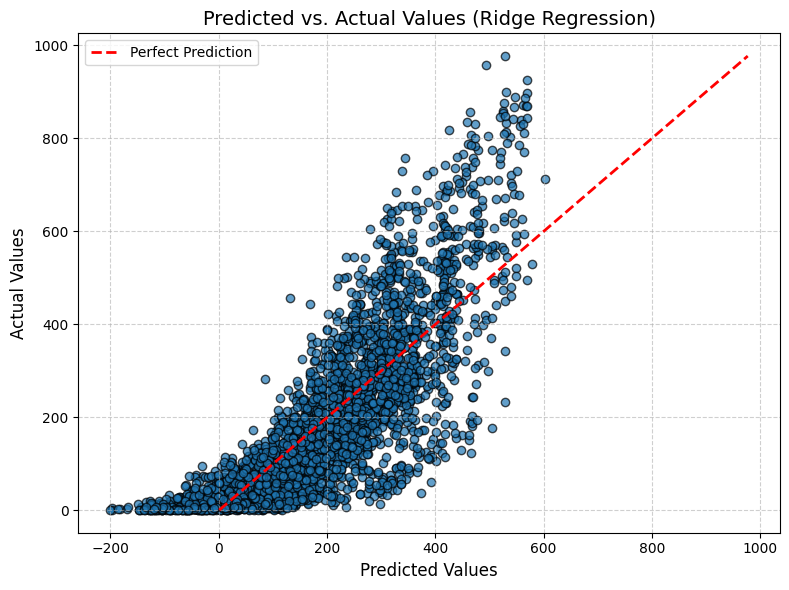

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ridge, y_test, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.title('Predicted vs. Actual Values (Ridge Regression)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#### Residual Plot

Shows residuals(actual-predicted) against the predicted value. The line of points sloping downwards suggests that there was bias in the model.

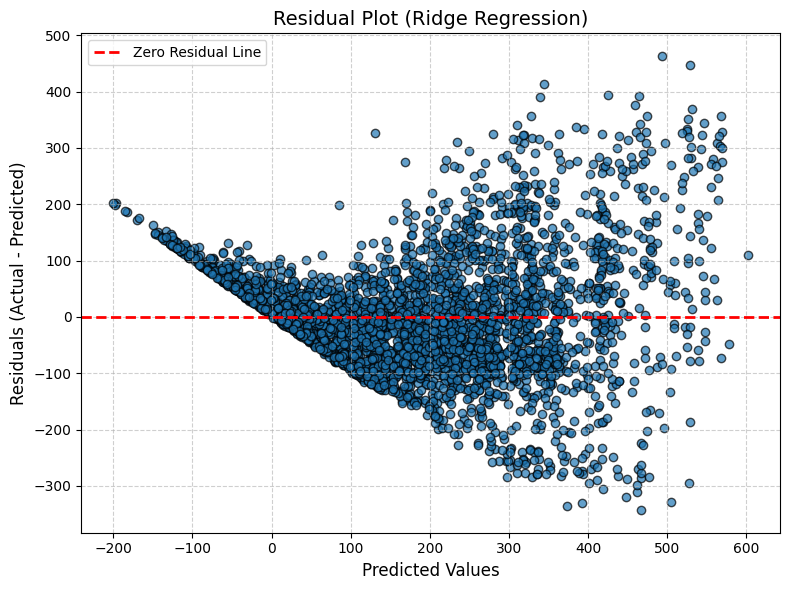

In [ ]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ridge, y_test-y_pred_ridge, alpha=0.7, edgecolor='k')
plt.axhline(0, color='r', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot (Ridge Regression)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Random Forest Regressor

We chose to implement random forest regressor becuase we thought it effectively handles more complex relationships since we had a lot of different features.

In [ ]:
# Initialize pipeline with the column transformer and the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

rf_pipe = Pipeline(steps=[('preprocessor', ct),
                      ('classifier', RandomForestRegressor())])

In [ ]:
# Create parameter grid and initialize grid object
rf_param_grid = [{'classifier': [RandomForestRegressor()],
               'classifier__max_depth': [3, 5, 7, 9, 11],
               'preprocessor': [ct]
              }]

rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5, return_train_score=True)

In [ ]:
# Fit grid object to training data
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit'])])),
                                       ('classifier',
                                        RandomForestRegressor())]),
             param_grid=[{'classifier': [RandomForestRegressor()],
                          'classifier__max_depth': [3, 5, 7, 9, 11],
                          'preprocessor': [ColumnTransformer(transformers=[('onehot',
                                                                            OneHotEncoder(sparse_output=False),
                                                                            ['season',
                                                                             'yr',
                                                                             'mnth',
                                                                             'hr',
                                                                             'holiday',
                                                                             'weekday',
                                                                             'workingday',
                                                                             'weathersit'])])]}],
             return_train_score=True)

In [ ]:
# Print the results from the grid search for the Random Forest Regressor model
print("Best params:\n{}\n".format(rf_grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(rf_grid.cv_results_['mean_train_score'][rf_grid.best_index_]))
print("Best cross-validation score: {:.2f}".format(rf_grid.best_score_))
print("Test-set score: {:.2f}".format(rf_grid.score(X_test, y_test)))

Best params:
{'classifier': RandomForestRegressor(), 'classifier__max_depth': 11, 'preprocessor': ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False),
                                 ['season', 'yr', 'mnth', 'hr', 'holiday',
                                  'weekday', 'workingday', 'weathersit'])])}

Best cross-validation train score: 0.74
Best cross-validation score: 0.70
Test-set score: 0.70


In [ ]:
# Use best estimator from grid search to predict test data
y_pred_rf = rf_grid.best_estimator_.predict(X_test)

In [ ]:
# Compute regression metrics
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = root_mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print("R^2 Score: {:.2f}".format(rf_r2))
print("Mean Squared Error (MSE): {:.2f}".format(rf_mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rf_rmse))
print("Mean Absolute Error (MAE): {:.2f}".format(rf_mae))

R^2 Score: 0.70
Mean Squared Error (MSE): 9887.33
Root Mean Squared Error (RMSE): 99.44
Mean Absolute Error (MAE): 69.47


#### Predicted vs Actual plot

Compares predicted count values with the actual count values.
Perfect predictions are when points are lying on the red dotted line. There was some miscalculation for some points since we saw a vertical line at some of the predicted value numbers.

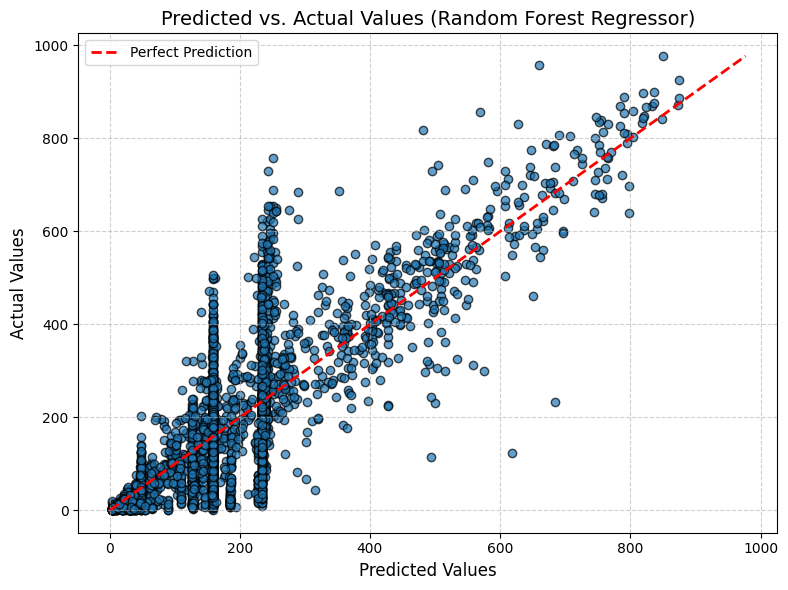

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, y_test, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.title('Predicted vs. Actual Values (Random Forest Regressor)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#### Residual Plot

Shows residuals(actual-predicted) against the predicted value. Same trend line of vertical points were present in this graph also suggesting there was bias.

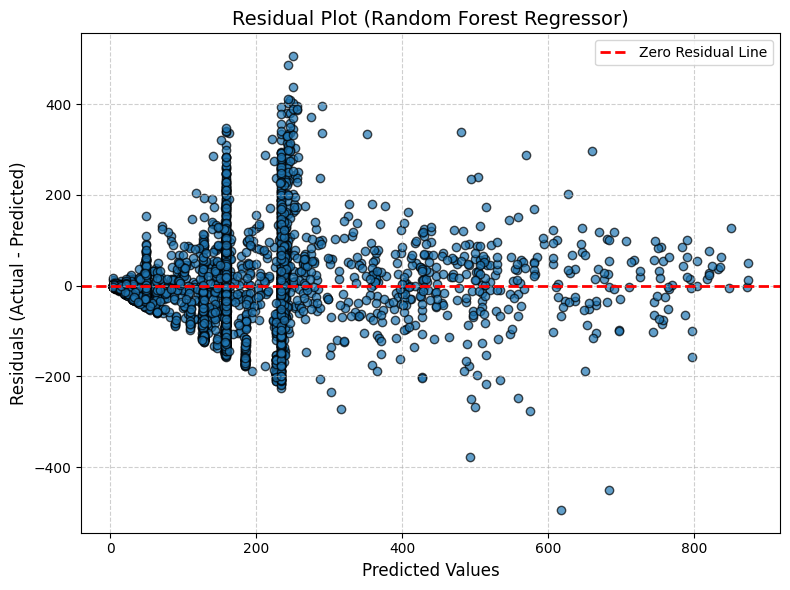

In [ ]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, y_test-y_pred_rf, alpha=0.7, edgecolor='k')
plt.axhline(0, color='r', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot (Random Forest Regressor)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Gradient Boosting Regressor

We chose to use gradient boosting to see if we could further improve our results from our random forest model.

In [ ]:
# Initialize pipeline with the column transformer and the Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

gb_pipe = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', GradientBoostingRegressor())
])

In [ ]:
# Create parameter grid and initialize grid object
gb_param_grid = [{'classifier': [GradientBoostingRegressor()],
               'classifier__n_estimators': [50, 100, 200],
               'classifier__learning_rate': [0.01, 0.1, 0.2],
               'classifier__max_depth': [3, 5, 7, 9],
               'preprocessor': [ct]
}]
gb_grid = GridSearchCV(gb_pipe, gb_param_grid, cv=5, return_train_score=True)


In [ ]:
# Fit grid object to training data
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit'])])),
                                       ('classifier',
                                        GradientBoostingRegressor())]),
             param_grid=[{'classifier': [GradientBoostingRegressor()],
                          'classifier__learning_rate': [0.01, 0.1, 0.2],
                          'classifier__max_depth': [3, 5, 7, 9],
                          'classifier__n_estimators': [50, 100, 200],
                          'preprocessor': [ColumnTransformer(transformers=[('onehot',
                                                                            OneHotEncoder(sparse_output=False),
                                                                            ['season',
                                                                             'yr',
                                                                             'mnth',
                                                                             'hr',
                                                                             'holiday',
                                                                             'weekday',
                                                                             'workingday',
                                                                             'weathersit'])])]}],
             return_train_score=True)

In [ ]:
# Print the results
print("Best params:\n{}\n".format(gb_grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(gb_grid.cv_results_['mean_train_score'][gb_grid.best_index_]))
print("Best cross-validation score: {:.2f}".format(gb_grid.best_score_))
print("Test-set score: {:.2f}".format(gb_grid.score(X_test, y_test)))

Best params:
{'classifier': GradientBoostingRegressor(), 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'preprocessor': ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False),
                                 ['season', 'yr', 'mnth', 'hr', 'holiday',
                                  'weekday', 'workingday', 'weathersit'])])}

Best cross-validation train score: 0.95
Best cross-validation score: 0.91
Test-set score: 0.91


In [ ]:
# Use best estimator from grid search to predict test data
y_pred_gb = gb_grid.best_estimator_.predict(X_test)

In [ ]:
# Compute regression metrics
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = root_mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)

print("R^2 Score: {:.2f}".format(gb_r2))
print("Mean Squared Error (MSE): {:.2f}".format(gb_mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(gb_rmse))
print("Mean Absolute Error (MAE): {:.2f}".format(gb_mae))

R^2 Score: 0.91
Mean Squared Error (MSE): 3044.10
Root Mean Squared Error (RMSE): 55.17
Mean Absolute Error (MAE): 34.88


#### Predicted vs Actual plot

Compares predicted count values with the actual count values.
Perfect predictions are when points are lying on the red dotted line. The model seemed to follow the trend line quite well.

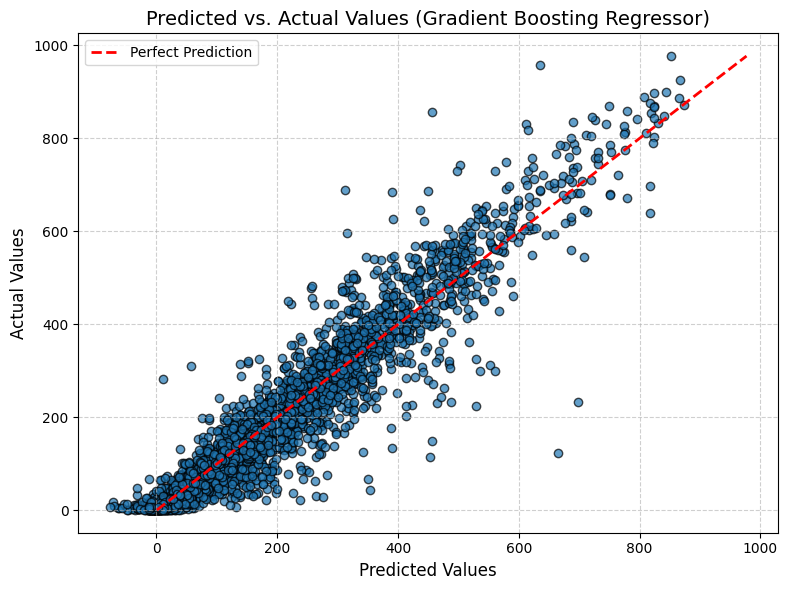

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gb, y_test, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.title('Predicted vs. Actual Values (Gradient Boosting Regressor)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#### Residual Plot

Shows residuals(actual-predicted) against the predicted value. The downward sloping line of points was not as significant for this model but was still noticeable.

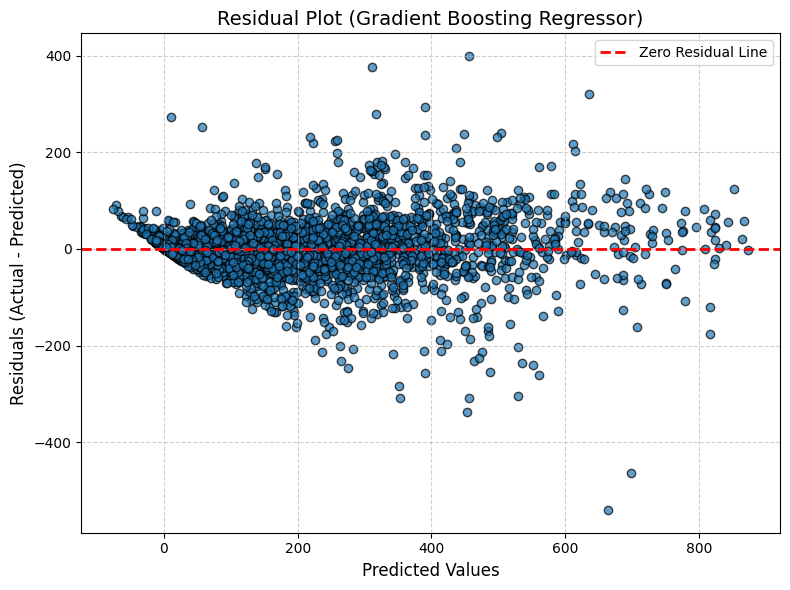

In [ ]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gb, y_test-y_pred_gb, alpha=0.7, edgecolor='k')
plt.axhline(0, color='r', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot (Gradient Boosting Regressor)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### K-Nearest Neighbors Regression (KNN)

We chose to look at KNN since it was a simplier model where it looks at historical patterns in the data.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_pipe = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', KNeighborsRegressor())
])

In [ ]:
# Create parameter grid and initialize grid object
knn_param_grid = [{'classifier': [KNeighborsRegressor()],
               'classifier__n_neighbors': [3, 5, 7, 9],
               'classifier__weights': ['uniform', 'distance'],
               'preprocessor': [ct]
}]
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=5, return_train_score=True)

In [ ]:
# Fit the model
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit'])])),
                                       ('classifier', KNeighborsRegressor())]),
             param_grid=[{'classifier': [KNeighborsRegressor()],
                          'classifier__n_neighbors': [3, 5, 7, 9],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessor': [ColumnTransformer(transformers=[('onehot',
                                                                            OneHotEncoder(sparse_output=False),
                                                                            ['season',
                                                                             'yr',
                                                                             'mnth',
                                                                             'hr',
                                                                             'holiday',
                                                                             'weekday',
                                                                             'workingday',
                                                                             'weathersit'])])]}],
             return_train_score=True)

In [ ]:
print("Best params:\n{}\n".format(knn_grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(knn_grid.cv_results_['mean_train_score'][knn_grid.best_index_]))
print("Best cross-validation score: {:.2f}".format(knn_grid.best_score_))
print("Test-set score: {:.2f}".format(knn_grid.score(X_test, y_test)))

Best params:
{'classifier': KNeighborsRegressor(), 'classifier__n_neighbors': 9, 'classifier__weights': 'distance', 'preprocessor': ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False),
                                 ['season', 'yr', 'mnth', 'hr', 'holiday',
                                  'weekday', 'workingday', 'weathersit'])])}

Best cross-validation train score: 0.98
Best cross-validation score: 0.72
Test-set score: 0.74


In [ ]:
# Use best estimator from grid search to predict test data
y_pred_knn = knn_grid.best_estimator_.predict(X_test)

In [ ]:
# Compute regression metrics
knn_r2 = r2_score(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = root_mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)

print("R^2 Score: {:.2f}".format(knn_r2))
print("Mean Squared Error (MSE): {:.2f}".format(knn_mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(knn_rmse))
print("Mean Absolute Error (MAE): {:.2f}".format(knn_mae))

R^2 Score: 0.74
Mean Squared Error (MSE): 8598.71
Root Mean Squared Error (RMSE): 92.73
Mean Absolute Error (MAE): 58.08


#### Predicted vs Actual plot

Compares predicted count values with the actual count values.
Perfect predictions are when points are lying on the red dotted line. The model seemed to have a lot of outliers as points were spread apart.

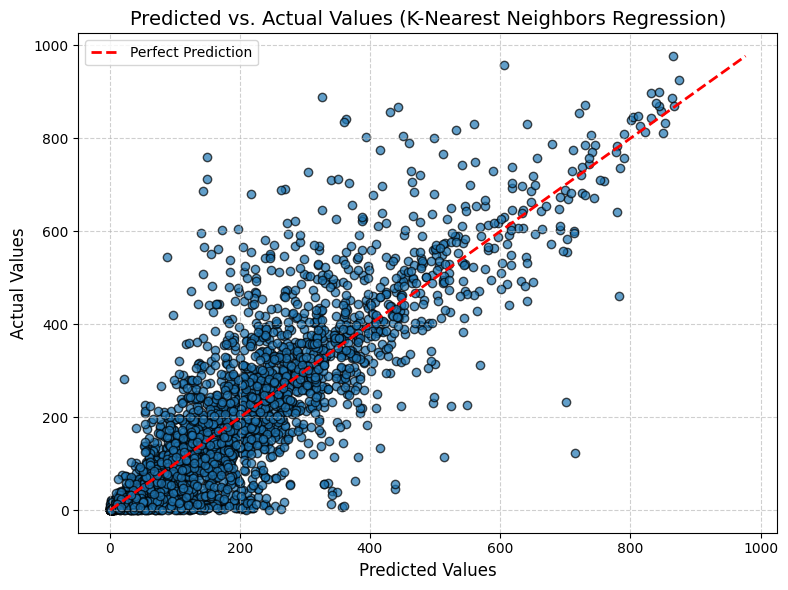

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_knn, y_test, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.title('Predicted vs. Actual Values (K-Nearest Neighbors Regression)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#### Residual Plot

Shows residuals(actual-predicted) against the predicted value. We can still see the downward sloping line of points trend happening for this model.

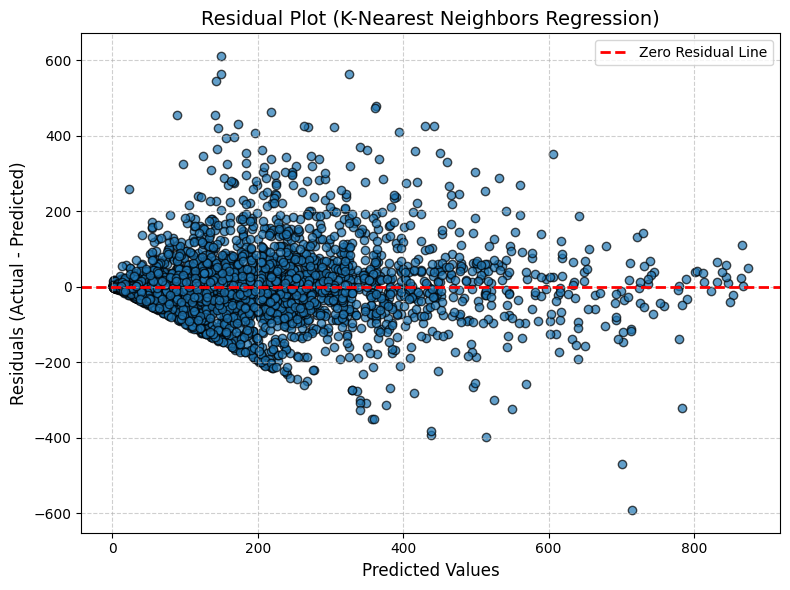

In [ ]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_knn, y_test-y_pred_knn, alpha=0.7, edgecolor='k')
plt.axhline(0, color='r', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot (K-Nearest Neighbors Regression)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Overall, we found out that our Gradient Boosting Regressor performed the best for our problem consistently giving us a score of around 0.9. Even though the score was high, we found that there was a major trend for our residual plots with the downward sloping points. This likely suggests that bias still exists in each model. A potential solution to this would be to include more features so the models can figure out the complex relationship a little better.

## Step 4: Visualization of Results

### Finding Feature Importance
To gain insights into the factors influencing bike-sharing demand, we analyzed feature importance using the Random Forest Regressor and Gradient Boosting Regressor. These models effectively capture complex, non-linear interactions between features like season, weather, and time of day, providing valuable insights into demand patterns.


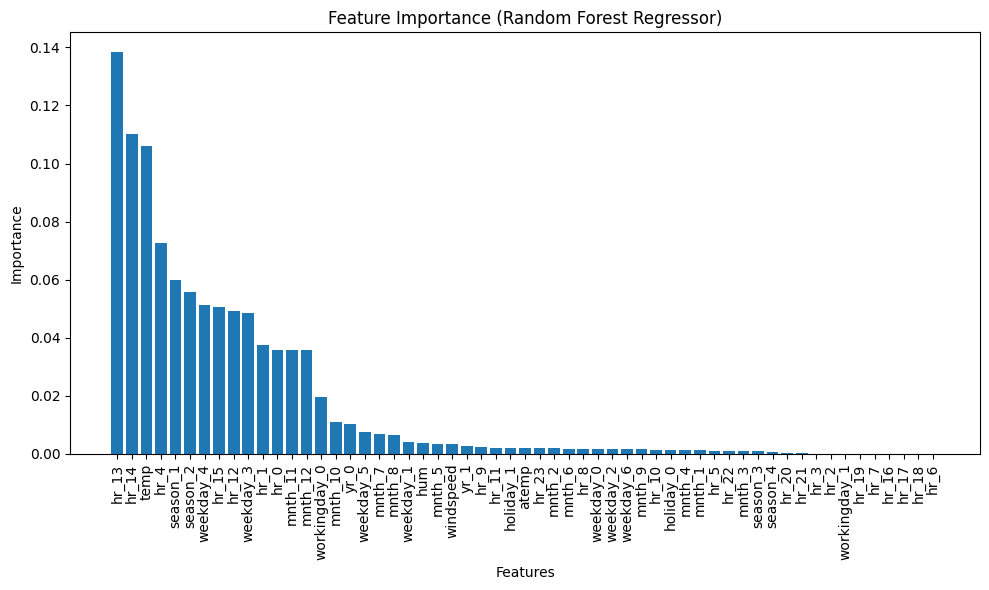

In [ ]:
# 1. Random Forest Regressor

# Extract the best model from the grid search
best_rf_model = rf_grid.best_estimator_.named_steps['classifier']

# Extract the feature importances
feature_importances = best_rf_model.feature_importances_

# Get feature names (numerical + one-hot encoded categorical features)
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

# Extract ColumnTransformer and OneHotEncoder from the pipeline
encoder = rf_grid.best_estimator_.named_steps['preprocessor'].named_transformers_['onehot']

# Combine numerical features with the one-hot encoded categorical features
all_feature_names = np.concatenate([numerical_features, encoder.get_feature_names_out(categorical_features)])

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest Regressor)")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), all_feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

The top 5 features that influence bike-sharing demand:
1. Hour (13:00) - Importance: ~0.14
This suggests that hour 13:00 is a key factor in predicting bike usage, likely reflecting lunchtime or increased daytime activity.

2. Hour (14:00) - Importance: ~0.11
Demand continues to stay high at 14:00, likely due to similar afternoon activity patterns.

3. Temperature - Importance: ~0.11
Temperature is an important factor in predicting bike usage, with weather conditions playing a significant role in demand patterns.

4. Hour (4:00) - Importance: ~0.07
The early morning demand is likely lower, but still important in understanding the demand curve throughout the day.

5. Season (1) - Importance: ~0.06
Seasonality plays a significant role, as certain seasons drive higher or lower demand for bike rentals.

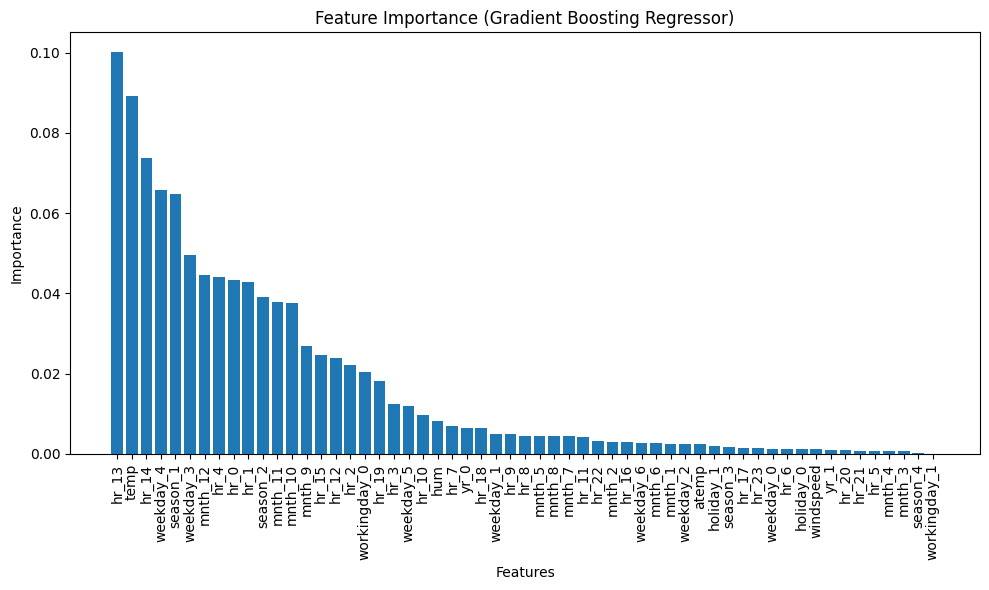

In [ ]:
# 2. Gradient Boosting Regressor

# Extract the best Gradient Boosting model from the grid search
best_gb_model = gb_grid.best_estimator_.named_steps['classifier']

# Extract the feature importances
feature_importances = best_gb_model.feature_importances_

# Get feature names (numerical + one-hot encoded categorical features)
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

# Extract ColumnTransformer and OneHotEncoder from the pipeline
encoder = gb_grid.best_estimator_.named_steps['preprocessor'].named_transformers_['onehot']

# Combine numerical features with the one-hot encoded categorical features
all_feature_names = np.concatenate([numerical_features, encoder.get_feature_names_out(categorical_features)])

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Gradient Boosting Regressor)")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), all_feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Results
The top 5 features that influence bike-sharing demand:

1. Hour (13:00) - Importance: ~0.10
This suggests that hour 13:00 is a key factor in predicting bike usage, likely reflecting lunchtime or increased daytime activity.

2. Temperature - Importance: ~0.09  Temperature is an important factor in predicting bike usage, with weather conditions playing a significant role in demand patterns.

3. Hour (14:00) - Importance: ~0.08
Demand continues to stay high at 14:00, likely due to similar afternoon activity patterns.


4. Weekday 4 (Thursday) - Importance: ~0.07 This indicates that demand on Thursdays is notably higher compared to other weekdays.

5. Season (1) - Importance: ~0.07 Seasonality plays a significant role, as certain seasons drive higher or lower demand for bike rentals.

##Analyze Important Features to Understand the Relationship Between Bike Demand
We decided to explore the factors that influence bike demand in more detail. By focusing on the top 3 most important features identified by our models—hour, temperature, and season—we aim to better understand how these factors impact bike demand.





###Finding Average Bike Demand Across the Hours of the Day

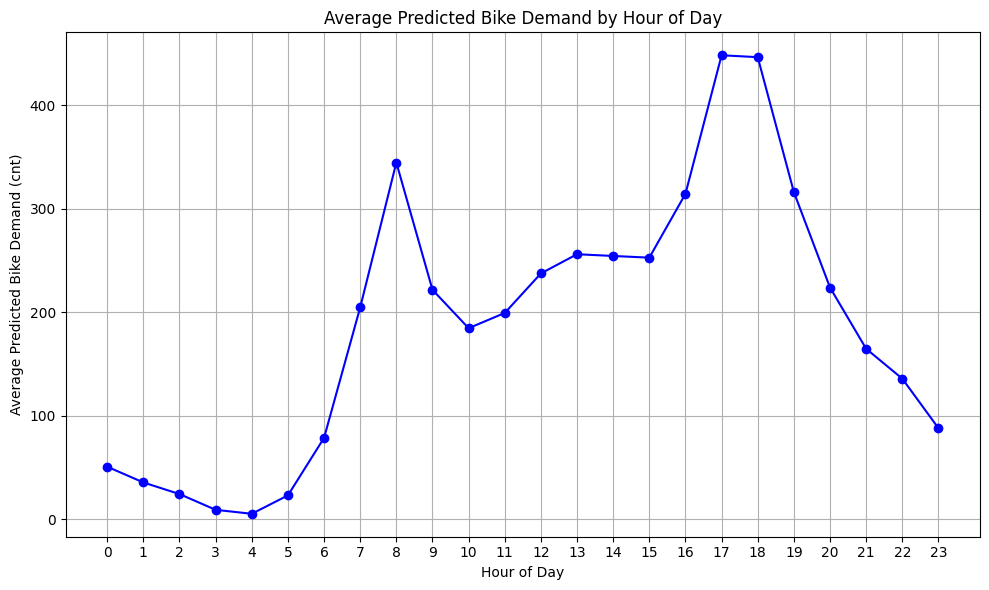

In [ ]:
# create a DataFrame
predicted_df = pd.DataFrame({'hour': X_test['hr'], 'predicted_demand': y_pred_gb})

# Group the predictions by hour and calculate the average predicted demand
hourly_predicted_demand = predicted_df.groupby('hour')['predicted_demand'].mean()

# Plot the predicted demand by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(hourly_predicted_demand.index, hourly_predicted_demand.values, marker='o', color='b')
plt.title("Average Predicted Bike Demand by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Predicted Bike Demand (cnt)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


Result and Interpretation:

Bike usage is lowest between 12 AM and 4 AM, with demand gradually decreasing from around 50 bikes to nearly zero by 4 AM. Demand rises sharply after 5 AM, reaching a significant surge as people begin their daily activities. This trend continues until 8 AM, likely due to the morning commute. The highest demand occurs between 4 PM and 5 PM, with bike usage surpassing 450 bikes on average, reflecting the evening rush hour. Afterward, demand stabilizes around 6 PM and gradually drops, falling to below 100 bikes by 11 PM.

###Finding Average Bike Demand Across Temperature Ranges

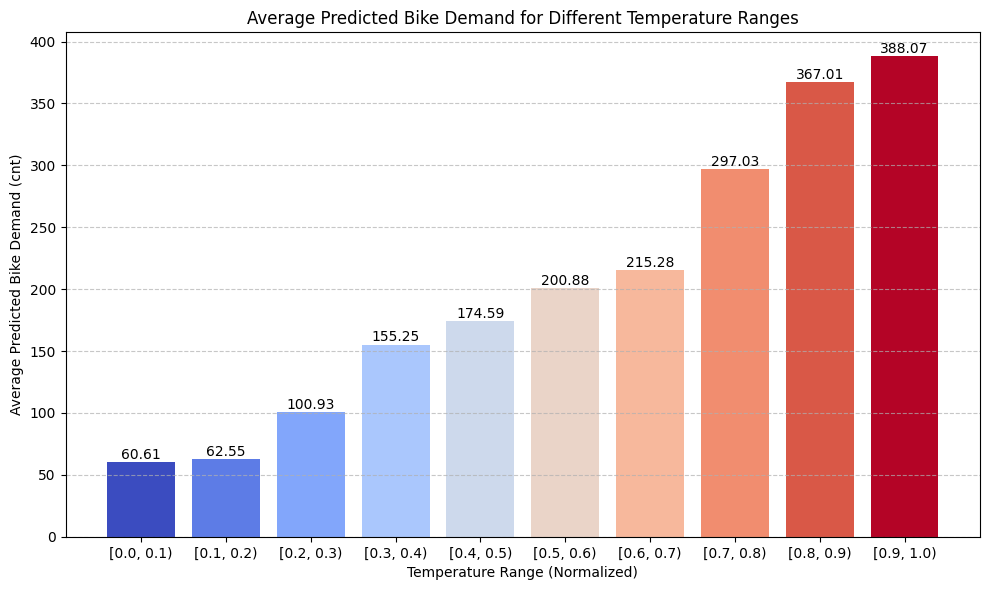

In [ ]:
# Creating bins for 'temp' with specified ranges (0.0, 0.1, 0.2, ..., 1.0)
temp_bins = pd.cut(X_test['temp'], bins=np.arange(0, 1.1, 0.1), right=False)

# Creating a DataFrame to group by the 'temp' ranges
temp_range_df = pd.DataFrame({'temp_range': temp_bins, 'predicted_demand': y_pred_gb})

# Group by the 'temp_range' and calculate average predicted bike demand in each range
temp_range_avg_predicted_demand = temp_range_df.groupby('temp_range', observed=False)['predicted_demand'].mean()

plt.figure(figsize=(10, 6))

# Color the bars based on temperature ranges using a colormap
bars = plt.bar(temp_range_avg_predicted_demand.index.astype(str), temp_range_avg_predicted_demand.values,
               color=plt.cm.coolwarm(np.linspace(0, 1, len(temp_range_avg_predicted_demand))))

plt.title("Average Predicted Bike Demand for Different Temperature Ranges", fontsize=12)
plt.xlabel("Temperature Range (Normalized)", fontsize=10)
plt.ylabel("Average Predicted Bike Demand (cnt)", fontsize=10)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Note: The UCI page provides temperature data, including the minimum and maximum values (t_min = -8°C, t_max = 39°C),
# and explains how to normalize the temperature using the formula:
# normalized_temp = (t - t_min) / (t_max - t_min), where t is the temperature at a given time (on an hourly scale).

def normalized_to_real_temp(normalized_temp):
    t_min = -8  # Minimum temperature in Celsius
    t_max = 39  # Maximum temperature in Celsius
    return normalized_temp * (t_max - t_min) + t_min

# Creating bins for 'temp' with specified ranges (0.0, 0.1, 0.2, ..., 1.0)
temp_bins = pd.cut(X_test['temp'], bins=np.arange(0, 1.1, 0.1), right=False)

# Creating a DataFrame to group by the 'temp' ranges
temp_range_df = pd.DataFrame({'temp_range': temp_bins, 'predicted_demand': y_pred_gb})

# Group by the 'temp_range' and calculate average predicted bike demand in each range
temp_range_avg_predicted_demand = temp_range_df.groupby('temp_range', observed=False)['predicted_demand'].mean()

for temp_range, avg_demand in temp_range_avg_predicted_demand.items():
    # Get the lower and upper bounds of the temperature range in normalized form
    lower_bound, upper_bound = temp_range.left, temp_range.right

    # Convert the normalized temperature range to real temperature range
    real_lower_temp = normalized_to_real_temp(lower_bound)
    real_upper_temp = normalized_to_real_temp(upper_bound)

    # Print the results
    print(f"Temperature Range: [{lower_bound:.1f}, {upper_bound:.1f}) -> "
          f"{real_lower_temp:.2f}°C - {real_upper_temp:.2f}°C | "
          f"Average Predicted Bike Demand: {avg_demand:.2f}")


Temperature Range: [0.0, 0.1) -> -8.00°C - -3.30°C | Average Predicted Bike Demand: 60.61
Temperature Range: [0.1, 0.2) -> -3.30°C - 1.40°C | Average Predicted Bike Demand: 62.55
Temperature Range: [0.2, 0.3) -> 1.40°C - 6.10°C | Average Predicted Bike Demand: 100.93
Temperature Range: [0.3, 0.4) -> 6.10°C - 10.80°C | Average Predicted Bike Demand: 155.25
Temperature Range: [0.4, 0.5) -> 10.80°C - 15.50°C | Average Predicted Bike Demand: 174.59
Temperature Range: [0.5, 0.6) -> 15.50°C - 20.20°C | Average Predicted Bike Demand: 200.88
Temperature Range: [0.6, 0.7) -> 20.20°C - 24.90°C | Average Predicted Bike Demand: 215.28
Temperature Range: [0.7, 0.8) -> 24.90°C - 29.60°C | Average Predicted Bike Demand: 297.03
Temperature Range: [0.8, 0.9) -> 29.60°C - 34.30°C | Average Predicted Bike Demand: 367.01
Temperature Range: [0.9, 1.0) -> 34.30°C - 39.00°C | Average Predicted Bike Demand: 388.07


Result and Interpretation:

Overall, bike demand increases as the temperature rises. The highest demand is observed between 34.30°C and 39.00°C (normalized temperature range [0.9, 1.0]) at 388 bikes, followed by the range 29.60°C to 34.30°C (normalized temperature range [0.8, 0.9]) with an average predicted bike demand of 367 bikes. The lowest demand is between -8.00°C and -3.30°C (normalized temperature range [0.0, 0.1]) at 61 bikes.









### Finding Average Bike Demand by Season


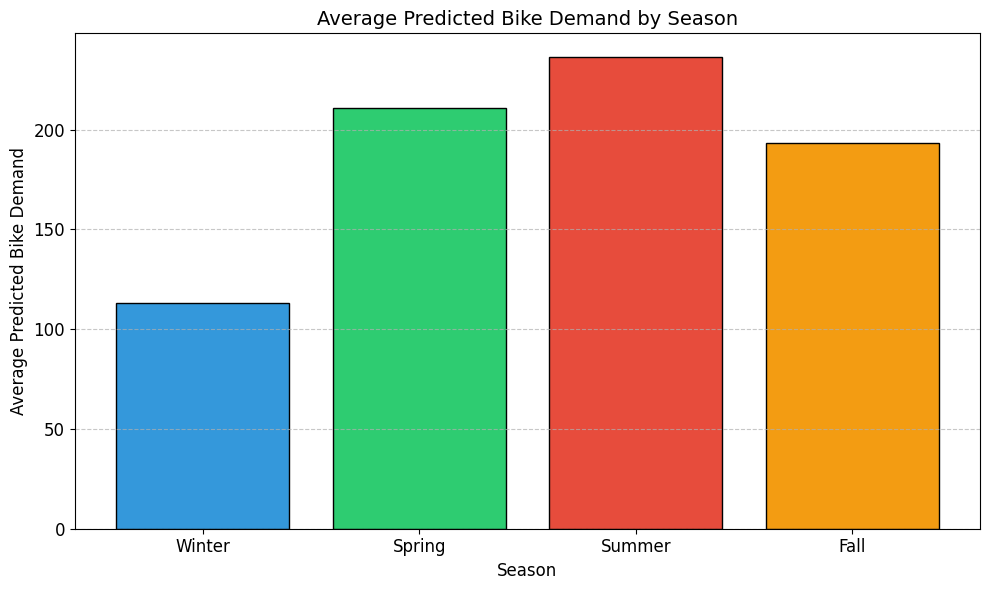

In [ ]:
# Create dataframe
predicted_df = pd.DataFrame({'season': X_test['season'], 'predicted_demand': y_pred_gb})

# Group by 'season' and calculate the mean predicted demand for each season
seasonal_demand = predicted_df.groupby('season')['predicted_demand'].mean()

season_labels = ['Winter', 'Spring', 'Summer', 'Fall']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

plt.figure(figsize=(10, 6))
bars = plt.bar(season_labels, seasonal_demand.values, color=colors, edgecolor='black')
plt.title("Average Predicted Bike Demand by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Predicted Bike Demand", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Result and Interpretation:

The analysis of bike demand by season reveals that the highest average demand occurs during the summer, with approximately 250 bikes on average. This is followed by spring, where the demand is just over 200 bikes. The fall season shows a slightly lower demand, averaging just below 200 bikes, while winter has the lowest average demand, with just above 100 bikes.

###References

Lecture Notes and Examples
Course: ENSF 611 - Machine Learning for Software

1. Decision Trees
2. Ensemble Methods
3. Assignment 4

Generative AI: ChatGPT Contributions

1. Provided guidance on debugging data extraction during finding important feature process, including the recommendation to utilize `.named_steps` and `get_feature_names_out`
2. Suggested revisions for improving the visual appeal of graph visualizations.
3. Asisted in converting normalized temperature data back to real temperatures in Celsius.

Bike Sharing UCI Machine Learning Repository

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
